# SplitBetlAnalsyis_MethodSelection

This notebook examines the results of classificaiton model training and testing to identify robustly performing models and determine which features are important for their performance.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns # Also to visualize
from patsy import dmatrices
current_palette = sns.color_palette()

# General Analysis of All Models 

In [2]:
df = pd.read_csv("../SQLDataBase.csv")

df.loc[df[(df['date'] == '1916-01-01') ].index.values, 'order']= 1
df.loc[df[(df['date'] == '1917-01-01') ].index.values, 'order']= 2
df.loc[df[(df['date'] == '1918-01-01') ].index.values, 'order']= 3
df.loc[df[(df['date'] == '1919-01-01') ].index.values, 'order']= 4
df.loc[df[(df['date'] == '1920-01-01') ].index.values, 'order']= 5

In [3]:
## AE Median
ModelResults = pd.read_csv("ModelResults_2020_12_29_Median.csv")
target_cols = 'AE_Median'
Features =  ['speed_diff', 'base', 'duration', 'age', 'height', 'bmi', 'C(clinical)[T.1.0]','C(male)[T.1.0]', 'C(tmfirst)[T.1.0]', 'basestd']
FeaturesClean = ['Spd Diff.', 'Base SLA', 'Duration', 'Age',  'Height', 'Bmi', 'Clinical', 'Male', 'TMFirst', 'BaseSLA_STD']
Y, X = dmatrices(target_cols + ' ~ speed_diff +base + duration + age +  height +  bmi + C(clinical) + C(male) + C(tmfirst) + basestd + order', df, return_type="dataframe")
feature_cols = Features
Outcome= "TMAfterMedian"

Method = ""


# Feature Importance Extraction

In [4]:
import json 

def ParseFearues(ModelResults):
    
    # Initialize the new columns for the Feature Importance
    stringer = ModelResults.loc[22, "FeatureImportance"]
    stringer = stringer.replace("\'", "\"")
    Getkeys = json.loads(stringer) 

    for k in Getkeys.keys():
        ModelResults[k]= ''
        #ModelResults[k]= ModelResults[k].apply(0)
        
    # For all Non-LR, get the features    
    for m in ModelResults[ModelResults["Classifier"]!='LR'].index.values:
        stringer = ModelResults.loc[m, "FeatureImportance"]
        stringer = stringer.replace("\'", "\"")
        res = json.loads(stringer) 
    
        ModelResults.loc[m, res.keys()]=res.values()
    
    #print(res.keys())
    ModelResults[list(res.keys())] = ModelResults[list(res.keys())].apply(pd.to_numeric)
    
    return(ModelResults)

In [5]:
ModelResults = ParseFearues(ModelResults)

ModelResults.tail()

,AUC-ROC,AUC_Var,All_AUC,All_Cohen_Kappa_50%,All_Cohen_Kappa_60%,All_Cohen_Kappa_70%,All_Cohen_Kappa_80%,All_Cohen_Kappa_90%,All_F1_score_50%,All_F1_score_60%,...,speed_diff,base,duration,age,height,bmi,C(clinical)[T.1.0],C(male)[T.1.0],C(tmfirst)[T.1.0],basestd
637,0.634145,0.003228,"[0.6133131887664415, 0.5737976782752903, 0.640...","[0.18577503543733842, 0.14864864864864868, 0.2...","[0.10319410319410327, 0.08396124865446719, 0.1...","[0.1311922435994548, 0.06180665610142633, 0.20...","[0.03587443946188329, 0.04045643153526968, 0.1...","[0.021233779751578585, 0.04499915095941598, 0....","[0.5333333333333333, 0.5531914893617023, 0.586...","[0.5165562913907286, 0.5548387096774193, 0.573...",...,0.163243,0.126910,0.099349,0.134902,0.086375,0.103180,0.022617,0.004007,0.076629,0.182789
638,0.678476,0.004563,"[0.6421969427657306, 0.6226276027271053, 0.674...","[0.18577503543733842, 0.20270270270270274, 0.2...","[0.17690417690417692, 0.137064944384643, 0.247...","[0.17815482502651125, 0.06180665610142633, 0.1...","[0.12556053811659185, 0.09163208852005533, 0.1...","[0.0642564707515092, 0.09526235354049939, 0.08...","[0.5333333333333333, 0.5815602836879432, 0.603...","[0.5562913907284769, 0.5806451612903226, 0.604...",...,0.146757,0.143570,0.070822,0.135320,0.132505,0.112559,0.026959,0.005432,0.073202,0.152873
639,0.653040,0.007262,"[0.6103803768218983, 0.5575824580799705, 0.696...","[0.13407821229050276, 0.09459459459459463, 0.2...","[0.10319410319410327, 0.1105130965195551, 0.21...","[0.10771095288592647, 0.13998943475964076, 0.1...","[0.08071748878923757, 0.0660442600276625, 0.19...","[0.08576781625147456, 0.019867549668874385, 0....","[0.5037037037037037, 0.524822695035461, 0.5862...","[0.5165562913907286, 0.5677419354838709, 0.589...",...,0.148660,0.129148,0.109600,0.127608,0.085961,0.138078,0.028393,0.028457,0.076445,0.127651
640,0.690526,0.006490,"[0.6625488801990758, 0.6085314169891284, 0.691...","[0.2116234470107563, 0.14864864864864868, 0.29...","[0.17690417690417692, 0.1636167922497309, 0.27...","[0.15467353431298303, 0.11392850854023595, 0.2...","[0.17040358744394613, 0.1683955739972337, 0.16...","[0.10727916175143981, 0.09526235354049939, 0.0...","[0.5481481481481482, 0.5531914893617023, 0.603...","[0.5562913907284769, 0.5935483870967742, 0.620...",...,0.160464,0.134288,0.088556,0.124769,0.099005,0.112886,0.021732,0.012548,0.079332,0.166420
641,0.691852,0.007143,"[0.6597938144329897, 0.5954486825133591, 0.718...","[0.23747185858417408, 0.17567567567567566, 0.3...","[0.15233415233415237, 0.1636167922497309, 0.30...","[0.15467353431298303, 0.13998943475964076, 0.2...","[0.17040358744394613, 0.09163208852005533, 0.1...","[0.10727916175143981, 0.09526235354049939, 0.0...","[0.562962962962963, 0.5673758865248227, 0.6206...","[0.543046357615894, 0.5935483870967742, 0.6356...",...,0.143552,0.155099,0.094070,0.138502,0.115710,0.103105,0.019168,0.010109,0.079759,0.140927


# Plotting Functionality

In [6]:
def ByMetric(df, MetricMean, MetricVar, MetricAll, current_palette, MinRange=0, MaxVar=0):
    # Set up the matplotlib figure to show how SMOTING the data is beneficial for each model
    f, axes = plt.subplots(1, 3, sharex=False, figsize = (16, 8))
    
    ModelList = np.unique(ModelResults['Classifier'])
    
    for m in range(len(ModelList)):

        M_Name = ModelList[m]
        M_index = ModelResults[ModelResults['Classifier'] == M_Name].index.values

        # Subplot 1
        sns.distplot(df[MetricMean].loc[M_index], ax=axes[0], color=current_palette[m], label=M_Name)#formerly iloc
        axes[0].set_title(Outcome + ": " + MetricMean + " Distribution")
        axes[0].set_ylabel("Count")

        # Subplot 2
        axes[1].set_title(Outcome + ": " + MetricMean + " and " + MetricVar + " Variability")
        sns.scatterplot(x=MetricMean, y=MetricVar, data=df.loc[M_index], ax=axes[1], color=current_palette[m], label=M_Name)
        #Formerly iloc
        
        # Subplot 3
        axes[2].set_title(Outcome + ": " + MetricMean + " Behavior Over Folds")
        axes[2].set(xticks=np.arange(6), yticks=[0, .25, .50, .75, 1.0])
        if Method == "Addition":
            fold=["YA31->YA21", "YA->YG", "Y->Old", "Intact->Stroke"]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                axes[2].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        else:
            fold=[1, 2, 3, 4]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                axes[2].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        plt.ylabel(MetricMean)
    
    if MinRange != 0:
        #print(df.loc[M_index, MetricMean].max())
        [l_xlim, r_xlim] = axes[1].get_xlim()
        axes[1].fill([MinRange, r_xlim, r_xlim, MinRange], [0, 0, MaxVar, MaxVar], "k", alpha=.3) 
        BestIndex= ModelResults[(ModelResults[MetricMean] > MinRange) & (ModelResults[MetricVar] < MaxVar) ].index.values
        return BestIndex
 
    f.legend()
    #plt.savefig('GroupCrossValidation.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
    plt.show

In [7]:
def ByMetric_Clean(df, MetricAll, current_palette, MinRange=0, MaxVar=0):
    # Set up the matplotlib figure to show how SMOTING the data is beneficial for each model
    f, axes = plt.subplots(1, 2, sharex=False, figsize = (16, 8))
    
    ModelList = np.unique(ModelResults['Classifier'])
    
    for m in range(len(ModelList)):

        M_Name = ModelList[m]
        M_index = ModelResults[ModelResults['Classifier'] == M_Name].index.values

        # Subplot 1
        axes[0].set_title(Outcome + ": Mean and Variability")
        #sns.scatterplot(x=MetricMean, y=MetricVar, data=df.loc[M_index], ax=axes[1], color=current_palette[m], label=M_Name)
        #Formerly iloc
        
        # Subplot 2
        axes[1].set_title(Outcome + ": " + MetricAll + " Behavior Over Folds")
        axes[1].set(xticks=np.arange(6), yticks=[0, .25, .50, .75, 1.0])
        if Method == "Addition":
            fold=["YA31->YA21", "YA->YG", "Y->Old", "Intact->Stroke"]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                axes[1].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        else:
            fold=[1, 2, 3, 4]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                #print(np.mean(l1))
                #print(np.var(l1))
                # First
                sns.scatterplot(x=[np.mean(l1)], y=[np.var(l1)], data=df.loc[m], ax=axes[0], color=current_palette[m])#, label=M_Name
                
                # Second
                axes[1].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        plt.ylabel(MetricAll)
    
    #if MinRange != 0:
    #    #print(df.loc[M_index, MetricMean].max())
    #    [l_xlim, r_xlim] = axes[0].get_xlim()
    #    axes[1].fill([MinRange, r_xlim, r_xlim, MinRange], [0, 0, MaxVar, MaxVar], "k", alpha=.3) 
    #    BestIndex= ModelResults[(ModelResults[MetricMean] > MinRange) & (ModelResults[MetricVar] < MaxVar) ].index.values
    #    return BestIndex
 
    #f.legend()
    #plt.savefig('GroupCrossValidation.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
    plt.show

# Threshold to use for precision and recall

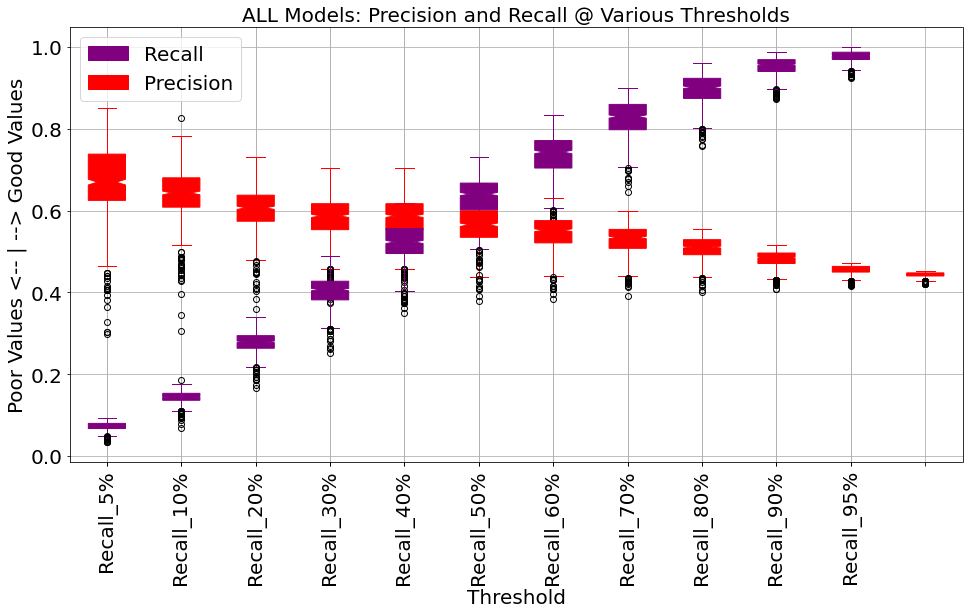

In [8]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize = (16, 8))

## First Subplot
AllPrecision=['Precision_5%','Precision_10%','Precision_20%','Precision_30%','Precision_30%', 'Precision_40%',
           'Precision_50%', 'Precision_60%', 'Precision_70%', 'Precision_80%', 'Precision_90%', 'Precision_95%']

c =  "red"
props1 = dict(boxes=c, whiskers=c, medians=c, caps=c)
ModelResults[AllPrecision].boxplot(figsize = (16, 8), rot=90, 
            notch=True, color=props1, patch_artist=True);

## Second Subplot
AllRecall=['Recall_5%','Recall_10%','Recall_20%','Recall_30%', 'Recall_40%', 'Recall_50%',
              'Recall_60%', 'Recall_70%', 'Recall_80%', 'Recall_90%', 'Recall_95%']

c2 = "purple"
props2 = dict(boxes=c2, whiskers=c2, medians=c2, caps=c2)
ModelResults[AllRecall].boxplot(figsize = (16, 8), rot=90, 
            notch=True, color=props2, patch_artist=True);

Recall_patch = mpatches.Patch(color=c2, label='Recall')
Precision_patch = mpatches.Patch(color=c, label='Precision')
plt.legend(handles=[Recall_patch, Precision_patch], prop={"size":20})

ax.set_title("ALL Models: Precision and Recall @ Various Thresholds", fontsize=20)
ax.set_xlabel("Threshold", fontsize=20)
ax.set_ylabel("Poor Values <-- | --> Good Values", fontsize=20)


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels() ): 
    item.set_fontsize(20)
        
plt.show()

In [9]:
# pull out a 'Good' example Model
ExMDL = ModelResults['Recall_50%'].idxmax()
print(ModelResults['Recall_50%'].loc[ExMDL])
print(ModelResults['Precision_50%'].loc[ExMDL])

0.7311653862696822
0.6304904554904555


# Selection of "Best Models"

### Function for plotting

In [10]:
def ByMetric(df, MetricMean, MetricVar, MetricAll, current_palette, MinRange=0, MaxVar=0):
    # Set up the matplotlib figure to show how SMOTING the data is beneficial for each model
    f, axes = plt.subplots(1, 3, sharex=False, figsize = (16, 8))
    
    ModelList = np.unique(ModelResults['Classifier'])
    
    for m in range(len(ModelList)):

        M_Name = ModelList[m]
        M_index = ModelResults[ModelResults['Classifier'] == M_Name].index.values

        # Subplot 1
        sns.distplot(df[MetricMean].loc[M_index], ax=axes[0], color=current_palette[m], label=M_Name)#formerly iloc
        axes[0].set_title(Outcome + ": " + MetricMean + " Distribution")
        axes[0].set_ylabel("Count")

        # Subplot 2
        axes[1].set_title(Outcome + ": " + MetricMean + " and " + MetricVar + " Variability")
        sns.scatterplot(x=MetricMean, y=MetricVar, data=df.loc[M_index], ax=axes[1], color=current_palette[m], label=M_Name)
        #Formerly iloc
        
        # Subplot 3
        axes[2].set_title(Outcome + ": " + MetricMean + " Behavior Over Folds")
        axes[2].set(xticks=np.arange(6), yticks=[0, .25, .50, .75, 1.0])
        if Method == "Addition":
            fold=["YA31->YA21", "YA->YG", "Y->Old", "Intact->Stroke"]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                axes[2].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        else:
            fold=[1, 2, 3, 4]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                axes[2].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        plt.ylabel(MetricMean)
    
    if MinRange != 0:
        #print(df.loc[M_index, MetricMean].max())
        [l_xlim, r_xlim] = axes[1].get_xlim()
        axes[1].fill([MinRange, r_xlim, r_xlim, MinRange], [0, 0, MaxVar, MaxVar], "k", alpha=.3) 
        BestIndex= ModelResults[(ModelResults[MetricMean] > MinRange) & (ModelResults[MetricVar] < MaxVar) ].index.values
        return BestIndex
 
    f.legend()
    #plt.savefig('GroupCrossValidation.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
    plt.show

In [11]:
def ByMetric_Clean(df, MetricAll, current_palette, MinRange=0, MaxVar=0):
    # Set up the matplotlib figure to show how SMOTING the data is beneficial for each model
    f, axes = plt.subplots(1, 2, sharex=False, figsize = (16, 8))
    
    ModelList = np.unique(ModelResults['Classifier'])
    
    for m in range(len(ModelList)):

        M_Name = ModelList[m]
        M_index = ModelResults[ModelResults['Classifier'] == M_Name].index.values

        # Subplot 1
        axes[0].set_title(Outcome + ": Mean and Variability")
        #sns.scatterplot(x=MetricMean, y=MetricVar, data=df.loc[M_index], ax=axes[1], color=current_palette[m], label=M_Name)
        #Formerly iloc
        
        # Subplot 2
        axes[1].set_title(Outcome + ": " + MetricAll + " Behavior Over Folds")
        axes[1].set(xticks=np.arange(6), yticks=[0, .25, .50, .75, 1.0])
        if Method == "Addition":
            fold=["YA31->YA21", "YA->YG", "Y->Old", "Intact->Stroke"]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                axes[1].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        else:
            fold=[1, 2, 3, 4]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                #print(np.mean(l1))
                #print(np.var(l1))
                # First
                sns.scatterplot(x=[np.mean(l1)], y=[np.var(l1)], data=df.loc[m], ax=axes[0], color=current_palette[m])#, label=M_Name
                
                # Second
                axes[1].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        plt.ylabel(MetricAll)
  
    plt.show

### Visualization of Performance Metrics

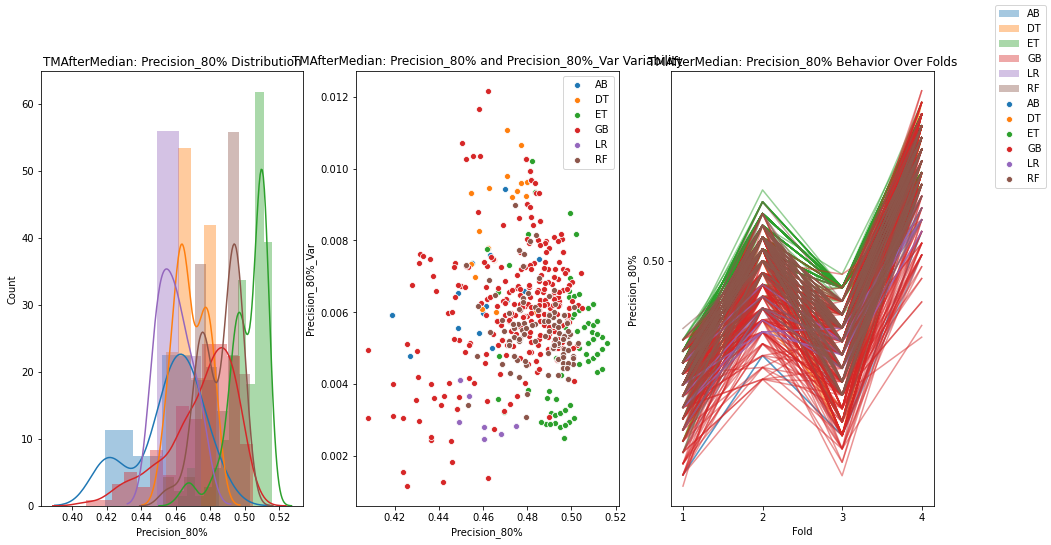

In [12]:
BestPrecIndex_80 = ByMetric(ModelResults, 'Precision_80%', "Precision_80%_Var", "All_Precision_80%", current_palette)

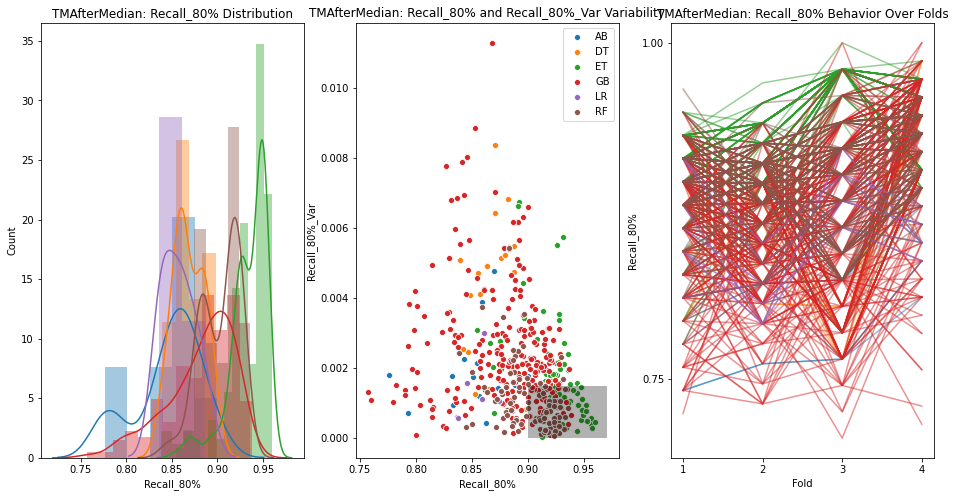

In [13]:
BestRecallIndex_80 = ByMetric(ModelResults, 'Recall_80%', "Recall_80%_Var", "All_Recall_80%", current_palette, 0.9, 0.0015)

### Selection of All or Best Models for future visualization

In [14]:
### All Models are selectured for future visualization
#BestModels = range(len(ModelResults))
#ModelResults['Best']=1

In [15]:
### Only "Best" Models are selected for future visualization
pd.set_option('display.max_colwidth', None)#-1

BestModels = list(set(BestRecallIndex_80))# & set(BestPrecIndex_80))# & set(BestF1Index_80) & set(BestCohenIndex_80))
ModelResults['Best']=0
ModelResults.loc[BestModels, 'Best'] = 1
ModelResults.loc[BestModels, ['Model', 'AUC-ROC']].head(100)

,Model,AUC-ROC
514,"GradientBoostingClassifier(learning_rate=0.01, max_depth=5,\n min_samples_split=10)",0.685378
515,"GradientBoostingClassifier(learning_rate=0.01, max_depth=10,\n min_samples_split=10)",0.694200
519,"GradientBoostingClassifier(max_depth=2, min_samples_split=5, subsample=0.5)",0.686498
520,"GradientBoostingClassifier(max_depth=5, min_samples_split=5, subsample=0.5)",0.707823
530,"GradientBoostingClassifier(max_depth=10, min_samples_split=5)",0.696895
...,...,...
173,"RandomForestClassifier(class_weight='balanced', max_depth=10,\n min_samples_split=10, n_estimators=10000)",0.718011
174,"RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=10,\n n_estimators=10000)",0.717517
175,"RandomForestClassifier(class_weight='balanced', max_depth=10,\n max_features='sqrt', min_samples_split=10,\n n_estimators=10000)",0.718045
176,"RandomForestClassifier(max_depth=10, min_samples_split=50, n_estimators=10000)",0.697698


# Feature Importance Visualizations

In [16]:
def SubplotMetricPerformance_BoxPlot(axes, df, BestModels, Feature):

    axes.set_title("Best Model Feature Imporance")
    df.loc[BestModels, Features].boxplot(ax=axes, rot=90);
    ##axes.boxplot(df.loc[BestModels, Features], orientation = 'vertical')

    #plt.setp(axes.set_xticklabels(FeaturesClean))
    axes.set_xticklabels(FeaturesClean)
    
    
    
    # Axis labels and title
    axes.set_xlabel('Features')
    axes.set_ylabel('Importance')
    
    
    for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] + axes.get_xticklabels() + axes.get_yticklabels() ): 
        item.set_fontsize(20)
  

In [17]:
def SubplotMetricPerformance_Example(axes, df, BestModels, Feature, ExampleBestModelIndex=0):
    
    #FeaturesClean = ['Spd Ratio', 'Spd Diff.', 'Mid Spd', 'Abrupt', 'Duration', 'Catch', 'Age', 'Young', 'Base SLA', 'Height', 'Weight','Bmi', 'Clinical']

    axes.set_title("Example Best Model Feature Imporance")
    
    fi = pd.DataFrame(columns = ['feature', 'importance'])
    for f in range(0, len(Features)):
        fi = fi.append({'feature': FeaturesClean[f], 'importance': df.loc[BestModels[ExampleBestModelIndex], Features[f]]}, ignore_index=True)
    
    # Make a bar chart
    axes.bar(fi.feature, fi.importance, orientation = 'vertical', color=current_palette[9])

    # Tick labels for x axis

    axes.set_xticks(fi.feature, FeaturesClean)
    plt.setp(axes.get_xticklabels(), rotation=90)
    
    # Axis labels and title
    axes.set_xlabel('Features')
    axes.set_ylabel('Importance')

    for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] + axes.get_xticklabels() + axes.get_yticklabels() ): 
        item.set_fontsize(20)

In [18]:
def FeatureImportanceVis(df, Features):
    f2, ax2_array = plt.subplots(2, 2, sharex=False, figsize = (16, 16))
    
    Best_index = df[df['Best'] == 1].index.values
    
    Axes_Labels = np.ravel(ax2_array)
    
    SubplotMetricPerformance_BoxPlot(Axes_Labels[0], df, BestModels, Features)
    SubplotMetricPerformance_Example(Axes_Labels[1], df, BestModels, Features, 28)#0 SpeedDifference: 317; Ratio = 312, 563
    SubplotMetricPerformance_Example(Axes_Labels[2], df, BestModels, Features, 102)#90 SpeedDifference: 517; Ratio = 565
    SubplotMetricPerformance_Example(Axes_Labels[3], df, BestModels, Features, 83)#20 SpeedDifference: 179; Ratio = 171
    
    f2.tight_layout(pad=3)
    #plt.savefig('FeatureImportance.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
    plt.show()

/Users/carlysombric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


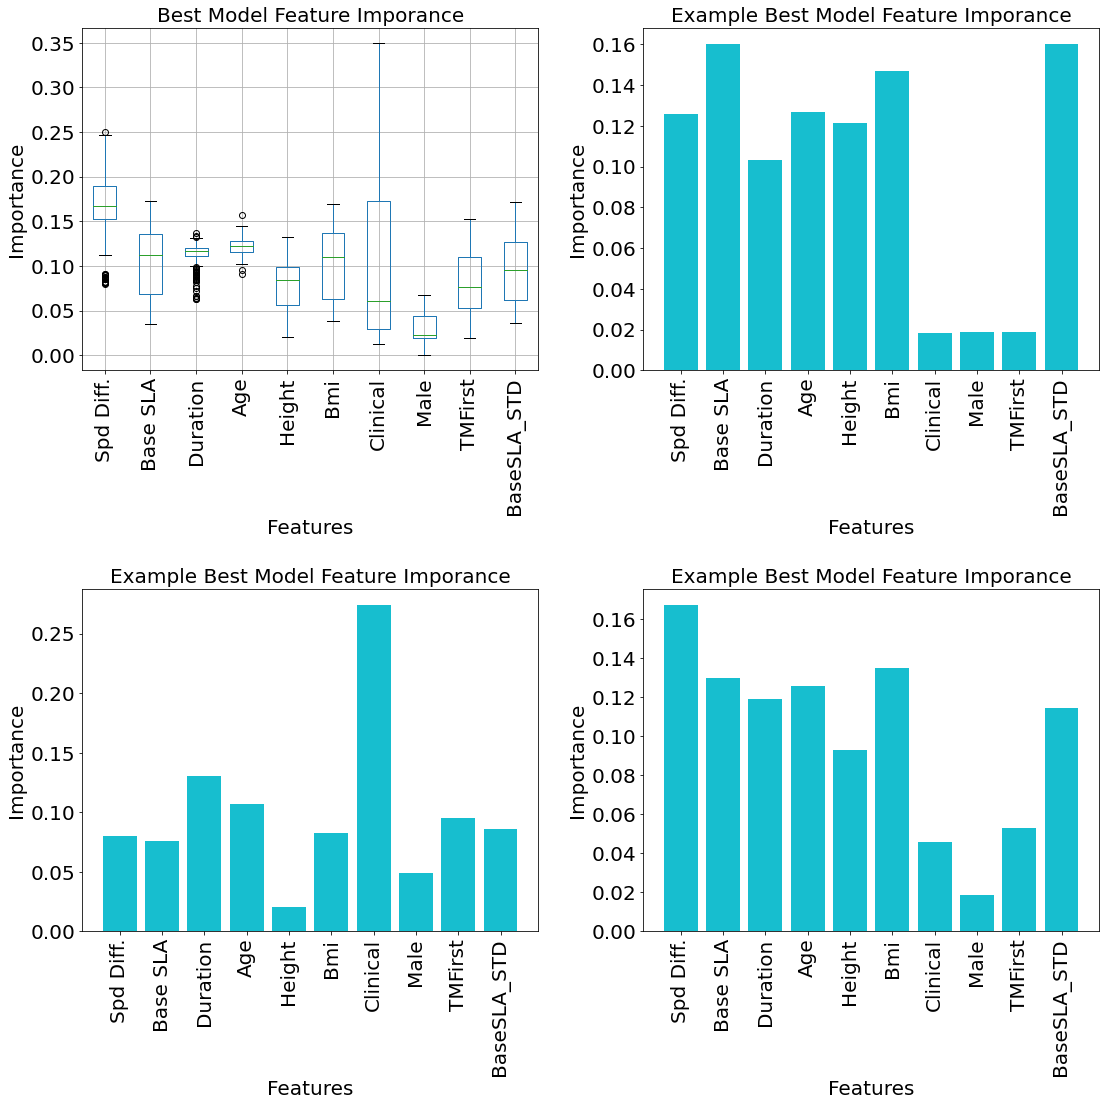

In [19]:
FeatureImportanceVis(ModelResults, Features)

# Just for fun, going to try to cluster analysis of the feature importance

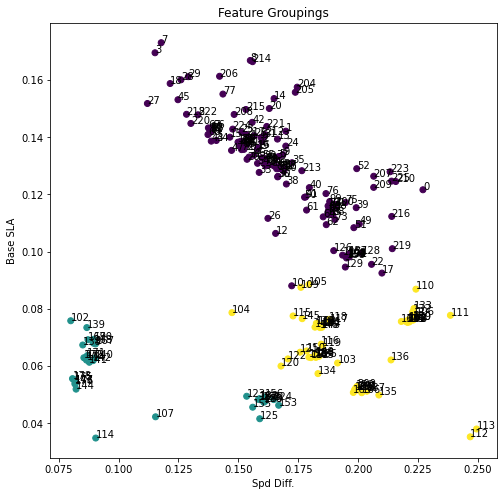

In [20]:
from sklearn.cluster import KMeans

f, ax = plt.subplots(1, 1, sharex=False, figsize = (8, 8))

Xtemp=[]
Xtemp = ModelResults.loc[BestModels, Features].values
Xtemp = Xtemp[~np.isnan(Xtemp).any(axis=1), :] # New 12/17/2020

y_pred = KMeans(n_clusters=3).fit_predict(Xtemp)

x_num = 0
y_num = 1

x=Xtemp[:, x_num]
plt.xlabel(FeaturesClean[x_num])
y=Xtemp[:, y_num] 
plt.ylabel(FeaturesClean[y_num])


plt.scatter(x, y, c=y_pred)
plt.title("Feature Groupings")

txt=range(0, len(BestModels))
for i in range(0, len(Xtemp)):
    ax.annotate(txt[i], (x[i], y[i]))
    
#plt.savefig('FeatureImportance_cluster.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
plt.show()

# Intuition of the Models
Partial Dependence Plots

In order to make the partial dependency plots, I am going to need to re-train the one of the "best" models.

In [21]:
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from mpl_toolkits.mplot3d import Axes3D
from patsy import dmatrices
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Temporal Cross-Validation

df.loc[df[(df['date'] == '1916-01-01') ].index.values, 'order']= 1
df.loc[df[(df['date'] == '1917-01-01') ].index.values, 'order']= 2
df.loc[df[(df['date'] == '1918-01-01') ].index.values, 'order']= 3
df.loc[df[(df['date'] == '1919-01-01') ].index.values, 'order']= 4
df.loc[df[(df['date'] == '1920-01-01') ].index.values, 'order']= 5

df_Interactions = pd.concat([X,Y], axis=1)

Features = df_Interactions[feature_cols]
Target = df_Interactions[target_cols]

In [23]:
TrainDictIndex = df_Interactions[(df_Interactions['order'] <= 4) ].index.values
TestDictIndex = df_Interactions[(df_Interactions['order'] == 5) ].index.values

X_train = Features.loc[TrainDictIndex]
X_test = Features.loc[TestDictIndex]
y_train = Target.loc[TrainDictIndex]
y_test = Target.loc[TestDictIndex]
y_test = y_test.values.ravel()
y_train = y_train.values.ravel()

In [24]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)            

#SMOTTING
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = feature_cols)

X_train = os_data_X
y_train = os_data_y


In [25]:
#BestModelEG = ExMDL 
BestModelEG = 80

In [26]:
model = eval(ModelResults.loc[BestModels[BestModelEG], "Model"]) 
EGC = model.fit(X_train, y_train)

### Visualization of the performance of individual models and literature predictions compared to observation

In [27]:
# Acquire the model specific probabilities
predicted_prob = np.array(model.predict_proba(X_test)[:,1])

print(np.min(predicted_prob))
print(np.max(predicted_prob))

0.197493805864819
0.8394514069471738


In [28]:
# In order to get the literature predictions I am assuming that:
# (A) TM Recalibration will always be higher if it is measured first
# (B) Within the order (first or second) that Recalibration will be ordered by speed difference
# This will be done in 3 steps.

#(1) Sort X_test
X_test_sorted=X_test.sort_values(by=['C(tmfirst)[T.1.0]', "speed_diff"])

# (2) Order: To get a linear spaced prediciton
X_test_sorted["LitPred"]=np.linspace(0, 1, len(X_test_sorted))

# (3) Un-sort
X_test_sorted = X_test_sorted.sort_index(axis=0)


In [29]:
#create a pandas dataframe with the results of the model, and the literature as columnmns
# And the actual outcome
A = predicted_prob.reshape(-1,1)
B = X_test_sorted["LitPred"]
C = y_test.reshape(-1,1)

D = np.column_stack((A,B, C))
Probabilites = pd.DataFrame(D, columns = ['ModelProb', 'LitPred', 'Actual']) 

In [30]:
# New 12/29/2020 -- Validated with the precision function from ClusterTraining
y_scores=Probabilites['ModelProb']
y_scores_sorted = y_scores.sort_values(ascending=False) #np.sort(np.array(Probabilites['ModelPred']))
k=50
cutoff_index = int(len(y_scores) * (k / 100.0))
cutoff_threshold = y_scores_sorted.iloc[cutoff_index]

predictions_binary = [1 if x > cutoff_threshold else 0 for x in y_scores]

Probabilites['ModelPred']=predictions_binary

In [31]:
# Sort the Probabilities
Probabilites=Probabilites.sort_values(by=['Actual', 'LitPred'])

#Probabilites.tail(15)

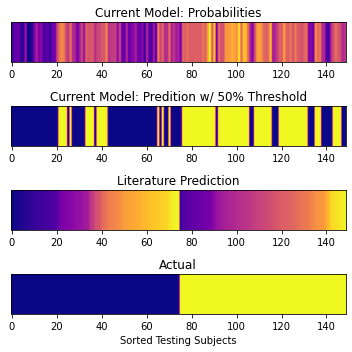

In [32]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

plt.rcParams["figure.figsize"] = 5,5

y1 = Probabilites['ModelProb']
y2 = Probabilites['ModelPred']
y3 = Probabilites['LitPred']
y4 = Probabilites['Actual']

fig, (ax1,ax2,ax3, ax4) = plt.subplots(nrows=4)#, sharex=True)

ax1.imshow(y1[np.newaxis,:], cmap="plasma", aspect="auto")
ax1.set_yticks([])
ax1.set_title('Current Model: Probabilities')

ax2.imshow(y2[np.newaxis,:], cmap="plasma", aspect="auto")
ax2.set_yticks([])
ax2.set_title('Current Model: Predition w/ 50% Threshold')

ax3.imshow(y3[np.newaxis,:], cmap="plasma", aspect="auto")
ax3.set_yticks([])
ax3.set_title('Literature Prediction')

plot = ax4.imshow(y4[np.newaxis,:], cmap="plasma", aspect="auto")
ax4.set_yticks([])
ax4.set_xlabel("Sorted Testing Subjects")
ax4.set_title('Actual')


plt.tight_layout()
plt.show()


The heatmaps provide a visual of those who had "good" (shown in more yellow colors) versus "poor" (shown in bluer colors) locomotor learning.  The ordering of the subjects is the same in all plots. The subjects are first ordered by "good" or "poor" outcomes as shown in the bottom row.  Withing this binary "good" and "poor" outcome, subjects are ordered based on literature predictions as shown in the third row. Literature prediction were estimated by linearly spaced the subjects based on my interpretation of literature.  Subjects are ordered first based on if the treamill after-effects are measured first (more likely to be a "good" outcome) and secondly based on the speed difference.  The first two rows show the performance of an example classification model. The first row shows the pure probabilites that the model outputs, and the second row shows the classification outcome based on a threshold.

Note that literature predictions do note align well with our expectations from the literature. Further note that this classifier is performing well.  Further analysis that could be informative is to compare the subjects that were differently classified by similarly high performing models. 

# Partial Dependence Plots

<Figure size 1152x1152 with 0 Axes>

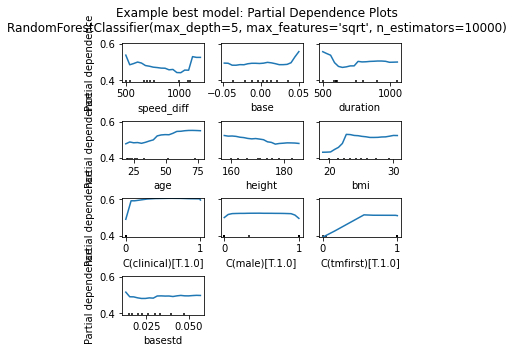

In [33]:
fig = plt.figure(figsize = (16, 16))

#features = ['speed_ratio', 'base', 'duration', 'age', 'bmi', 'height', 'basestd']
features = Features

if ModelResults.loc[BestModels[BestModelEG], "Classifier"] == 'GB':
    plot_partial_dependence(EGC, X_train, features,
                            n_jobs=3, grid_resolution=20, method='brute')
    print('GB bruted')
else:
    plot_partial_dependence(EGC, X_train, features,
                        n_jobs=3, grid_resolution=20)

fig = plt.gcf()
fig.suptitle('Example best model: Partial Dependence Plots\n'
             + ModelResults.loc[BestModels[BestModelEG], "Model"])
fig.subplots_adjust(hspace=1)

In [34]:
# Function from https://towardsdatascience.com/prettifying-partial-density-plots-in-python-1f7216937ff
def plot_pdp(model, X, feature, target=False, return_pd=False, y_pct=True, figsize=(10,9), norm_hist=True, dec=.5):
    # Get partial dependence
    
    if ModelResults.loc[BestModels[BestModelEG], "Classifier"] == 'GB':
        pardep = partial_dependence(model, X, [feature], method = 'brute')
    else:
        pardep = partial_dependence(model, X, [feature])
    
    # Get min & max values
    xmin = pardep[1][0].min()
    xmax = pardep[1][0].max()
    ymin = pardep[0][0].min()
    ymax = pardep[0][0].max()
    
    # Create figure
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.grid(alpha=.5, linewidth=1)
    
    # Plot partial dependence
    color = 'tab:blue'
    ax1.plot(pardep[1][0], pardep[0][0], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlabel(feature, fontsize=14)
    
    tar_ylabel = ': {}'.format(target) if target else ''
    ax1.set_ylabel('Partial Dependence{}'.format(tar_ylabel), color=color, fontsize=14)
    
    tar_title = target if target else 'Target Variable'
    ax1.set_title('Relationship Between {} and {}'.format(feature, tar_title), fontsize=16)
    
    if y_pct and ymin>=0 and ymax<=1:
        # Display yticks on ax1 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax1.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax1.set_yticklabels(labels)
    
    # Plot line for decision boundary
    #ax1.hlines(dec, xmin=xmin, xmax=xmax, color='black', linewidth=2, linestyle='--', label='Decision Boundary')
    #ax1.legend()

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.hist(X[feature], bins=80, range=(xmin, xmax), alpha=.25, color=color, density=norm_hist)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylabel('Distribution', color=color, fontsize=14)
    
    #if y_pct and norm_hist:
    #    # Display yticks on ax2 as percentages
    #    fig.canvas.draw()
    #    labels = [item.get_text() for item in ax2.get_yticklabels()]
    #    print(labels)
    #    #labels = [int(np.float(label)*100) for label in labels] # origonal
    #    labels = [int((np.float(label)/len(X[feature]))*100) for label in labels] # mine
    #    labels = ['{}%'.format(label) for label in labels]
    #    ax2.set_yticklabels(labels)
        
    #plt.savefig('Example_ParitalDependencyPlot_Nice_Model' + str(BestModelEG) + '_' + feature +'.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False) 
    plt.show()
    if return_pd:
        return pardep

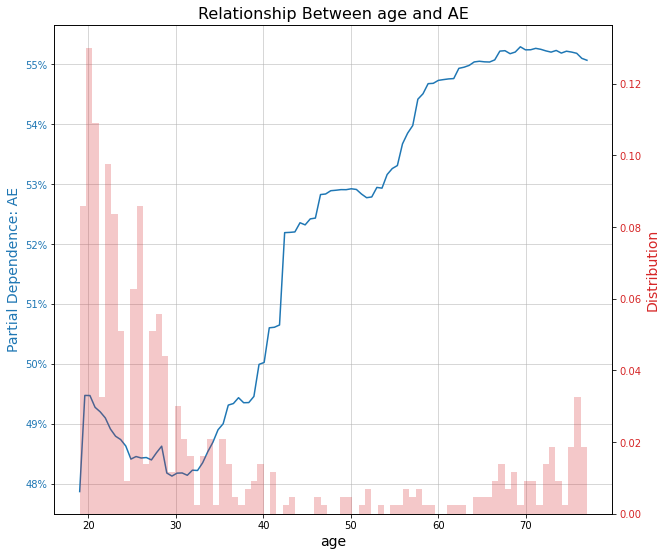

In [35]:
#plot_pdp(EGC, X_train, 'speed_diff', target='AE')
#plot_pdp(EGC, X_train, 'duration', target='AE')
#plot_pdp(EGC, X_train, 'base', target='AE')
#plot_pdp(EGC, X_train, 'bmi', target='AE')
plot_pdp(EGC, X_train, 'age', target='AE')
#plot_pdp(EGC, X_train, 'C(tmfirst)[T.1.0]', target='AE')
#plot_pdp(EGC, X_train, 'C(clinical)[T.1]', target='AE')
#plot_pdp(EGC, X_train, 'C(male)[T.1.0]', target='AE')
#plot_pdp(EGC, X_train, 'height', target='AE')


We additionally can gain insights into how a particulare model is using a feature. For example, here we can see that individuals over 40 are more likely to have a "good" outcome which is consistent with the literature.